# 4.11.06 Support vector machine (optional)

### Load data

In [1]:
# import commands
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the train features npz file
with np.load("train_features.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_features=tr["tr_features"]

In [3]:
# Load the train batch npz file
with np.load("train_batch.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_batch_imgs=tr["tr_batch_imgs"], 
    tr_batch_labels=tr["tr_batch_labels"]

In [4]:
# Load the test features npz file
with np.load("test_features.npz", allow_pickle=False) as te:
    # Load the arrays
    te_features=te["te_features"]

In [5]:
# Load the test batch npz file
with np.load("test_batch.npz", allow_pickle=False) as te:
    # Load the arrays
    te_batch_imgs=te["te_batch_imgs"], 
    te_batch_labels=te["te_batch_labels"]

## Task 1: SVM classifier
Try with an SVM classifier. Does the RBF kernel perform better than the linear one? You don’t need to tune the hyperparameters.

In [6]:
# linear kernel
from sklearn.svm import LinearSVC

# Create SVM with linear kernel
linear_svc = LinearSVC()

# Fit estimator
linear_svc.fit(tr_features, tr_batch_labels)

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LinearSVC()

In [7]:
# rbf kernel
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc = SVC(kernel="rbf", probability=True)

# Fit estimator
rbf_svc.fit(tr_features, tr_batch_labels)

SVC(probability=True)

In [8]:
# Compare accuracies
print("Test accuracy with linear kernel: {:.1f}%".format(100 * linear_svc.score(te_features, te_batch_labels)))
print("Test accuracy with rbf kernel: {:.1f}%".format(100 * rbf_svc.score(te_features, te_batch_labels)))

Test accuracy with linear kernel: 92.0%
Test accuracy with rbf kernel: 96.0%


## Task 2: Probability
Pick ten images and compute the probability for each category using the predict_proba() function of the best SVM estimator you found in the previous question. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.


In [9]:
# predict test images
pred = rbf_svc.predict_proba(te_features[7:17,:])

In [10]:
# Visualize the results in a DataFrame
predictions_10 = pd.DataFrame(pred)

In [11]:
# rename the columns and show propability result per image
predictions_10.columns = ['bike', 'car','motorcycle', 'other', 'truck', 'van']
predictions_10.round(2) 

,bike,car,motorcycle,other,truck,van
0,0.97,0.00,0.00,0.01,0.00,0.00
1,0.96,0.00,0.02,0.01,0.00,0.00
2,0.99,0.00,0.00,0.00,0.00,0.00
3,0.99,0.00,0.00,0.00,0.00,0.00
4,0.99,0.00,0.00,0.00,0.00,0.00
5,0.01,0.91,0.01,0.01,0.01,0.06
6,0.00,0.98,0.00,0.00,0.00,0.01
7,0.00,0.76,0.00,0.00,0.01,0.22
8,0.01,0.97,0.00,0.01,0.00,0.01
9,0.00,0.99,0.00,0.00,0.00,0.01


In [12]:
# actual class for each of the 10 images
te_batch_labels[7:17]

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)

In [13]:
# Convert 'te_batch_imgs' into Numpy array
img = np.array(te_batch_imgs)
img.shape

(1, 50, 224, 224, 3)

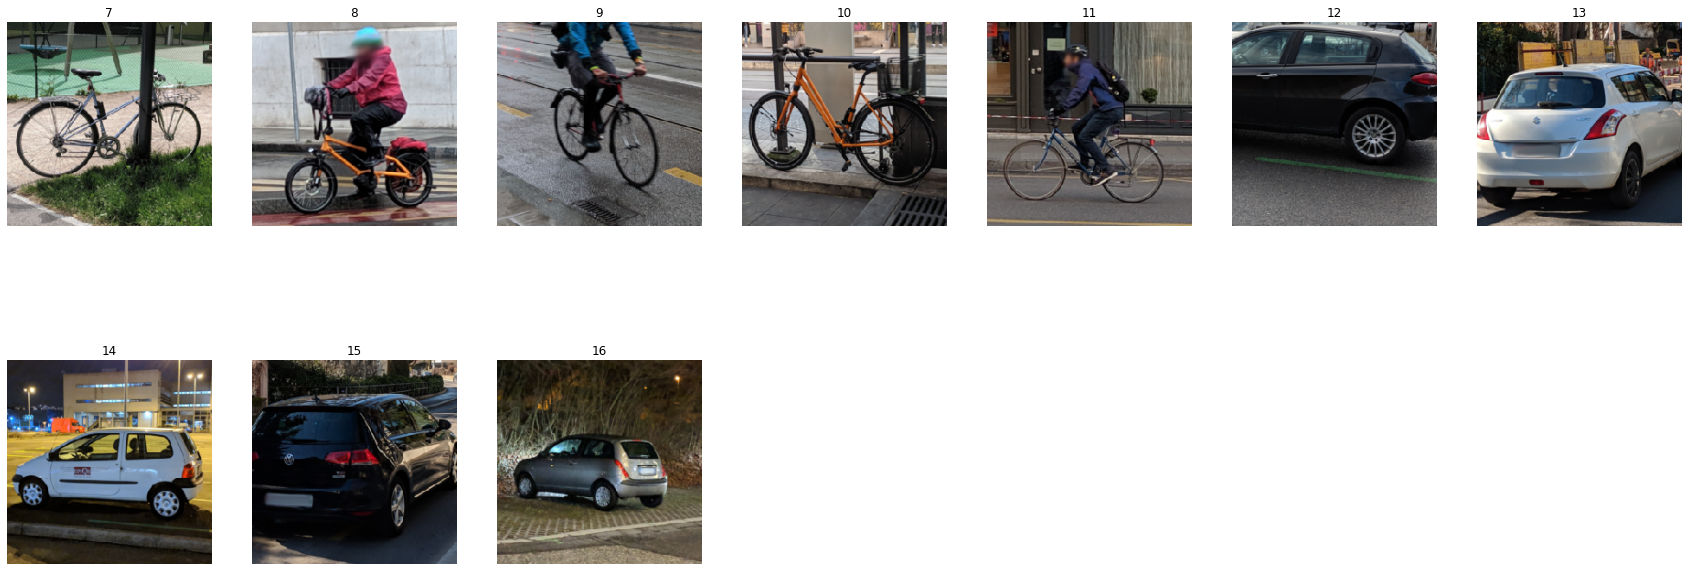

In [14]:
# plot the 10 images
fig = plt.figure(figsize=(30, 30))
    
for i in range(7,17):
    sub = fig.add_subplot(5, 7, i + 1)
    sub.imshow(img[0,i,:,:])
    plt.axis('off')
    plt.title(i)  # Adds title to image
plt.show();

## Task 3: regularization strength
Finally, vary the regularization strength of your SVM estimator (e.g. once using a C value of 0.0001 and once of 1000). What is the effect on the probabilities? Write your observations in a markdown cell.


In [15]:
# rbf kernel with C of 0.0001
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc_small = SVC(kernel="rbf", probability=True, C=0.0001)

# Fit estimator
rbf_svc_small.fit(tr_features, tr_batch_labels)

SVC(C=0.0001, probability=True)

In [16]:
# predict test images
pred_small = rbf_svc_small.predict_proba(te_features[7:17,:])

# Visualize the results in a DataFrame
predictions_10_small = pd.DataFrame(pred_small)

# rename the columns and show propability result per image
predictions_10_small.columns = ['bike', 'car','motorcycle', 'other', 'truck', 'van']
predictions_10_small.round(2) 

,bike,car,motorcycle,other,truck,van
0,0.53,0.09,0.06,0.15,0.09,0.07
1,0.46,0.07,0.19,0.14,0.09,0.05
2,0.54,0.09,0.06,0.14,0.10,0.07
3,0.55,0.08,0.06,0.14,0.10,0.06
4,0.54,0.09,0.07,0.14,0.10,0.06
5,0.07,0.56,0.04,0.07,0.06,0.20
6,0.08,0.56,0.04,0.11,0.06,0.14
7,0.04,0.45,0.02,0.03,0.05,0.40
8,0.08,0.56,0.04,0.14,0.06,0.13
9,0.07,0.59,0.04,0.08,0.07,0.15


In [17]:
# rbf kernel with C of 1000
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc_big = SVC(kernel="rbf", probability=True, C=1000)

# Fit estimator
rbf_svc_big.fit(tr_features, tr_batch_labels)

SVC(C=1000, probability=True)

In [18]:
# predict test images
pred_big = rbf_svc_big.predict_proba(te_features[7:17,:])

# Visualize the results in a DataFrame
predictions_10_big = pd.DataFrame(pred_big)

# rename the columns and show propability result per image
predictions_10_big.columns = ['bike', 'car','motorcycle', 'other', 'truck', 'van']
predictions_10_big.round(2) 

,bike,car,motorcycle,other,truck,van
0,0.97,0.01,0.00,0.01,0.00,0.00
1,0.97,0.00,0.02,0.01,0.00,0.00
2,0.99,0.00,0.00,0.00,0.00,0.00
3,0.99,0.00,0.00,0.00,0.00,0.00
4,0.99,0.00,0.00,0.00,0.00,0.00
5,0.01,0.91,0.01,0.01,0.01,0.06
6,0.00,0.98,0.00,0.00,0.00,0.01
7,0.00,0.69,0.00,0.00,0.01,0.29
8,0.01,0.97,0.00,0.01,0.00,0.01
9,0.00,0.99,0.00,0.00,0.00,0.01


In [19]:
# Compare accuracies
print("Test accuracy with regularization strength of 0.0001: {:.1f}%".format(100 * rbf_svc_small.score(te_features, te_batch_labels)))
print("Test accuracy with regularization strength of 1000: {:.1f}%".format(100 * rbf_svc_big.score(te_features, te_batch_labels)))

Test accuracy with regularization strength of 0.0001: 24.0%
Test accuracy with regularization strength of 1000: 94.0%


_Observation: With a regularization strength of 0.0001 the predictions clearly got worse. With a low value for C, the strength of the regularization is increased, which leads to simpler models and in this case, a worse model as it tends to underfit. On the other hand, a regularization strength of 1000 did not change the predictions, but there is a slight improvement. High values for C lower the strength of the regularization, so that the model can increase its complexity but it can also overfitt._